#Probabilidad de Bayes y Algoritmos Genéticos

**Nombre:** Silvia Viridiana Maldonado Zamora.

##Proyecto 1
Se sabe que el crecimiento poblacional está determinado por la función logística
\begin{equation}
x(t)=\frac{bx_o}{x_o + (b-x_o)e^{-at}}
\end{equation}
Esta función queda caracterizada por tres parámetros: $x_0$ es la población al tiempo $t= 0$, $b$ es la población máxima a la que se puede llegar (se llama límite de saturación y es el valor
de $x(t)$ en el límite $t$ → ∞; finalmente, $a$ es la tasa de crecimiento. Por supuesto, $x(t)$ es el tamaño de la población al tiempo $t$.

Implementa un algoritmo genético para encontrar los parámetros que mejor ajustan a los datos reales partiendo de la función logística con los parámetros iniciales $x_0=20$, $a=0.06$ y $b=162$.

In [780]:
#paqueterias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
años = list(range(1940, 2024))
df1 = pd.read_csv('./data/ProbBayes_AlgoritGeneticos/PoblacionMexico.dat', delimiter='\t', header = None)
df1.index = años
df1

,0,1
1940,0,19.763
1941,1,20.208
1942,2,20.657
1943,3,21.165
1944,4,21.674
...,...,...
2019,79,126.014
2020,80,126.128
2021,81,126.976
2022,82,127.796


In [782]:
#Definiendo la funcion logistica
def logistica(t, x0, a, b):
  return (b*x0)/(x0 + (b-x0)*np.exp(-a*t))

In [783]:
#Distancia para criterio de adaptabilidad
def distancia(y, modelo):
  return np.sum((y-modelo)**2)
y=df1[1]

In [784]:
#correr esta celda solo una vez para inicializar las variables
#y no perder el conteo
mutX,mutA,mutB=0,0,0 #contador de mutaciones aceptadas
#parametros iniciales
x0 = 20.000 #valor inicial 20.000
a = 0.060 #valor inicial 0.060
b = 162.000 #valor inicial 162.000

In [859]:
i=1
distanciaInicial=distancia(y, modelo=logistica(df1[0],x0, a, b))
while i<100000:
  mutacion=random.choice(['dx','da','db'])
  if mutacion=='dx':
    dx=round(np.random.normal(loc=0, scale=0.1),3) #promedio 0, desvEstandar 0.1
    x0=x0+dx
    modelo=logistica(df1[0],x0, a, b)
    i=i+1
  elif mutacion=='da':
    da=round(np.random.normal(loc=0, scale=0.001),3) #promedio 0, desvEstandar 0.001
    a=a+da
    modelo=logistica(df1[0],x0, a, b)
    i=i+1
  elif mutacion=='db':
    db=round(np.random.normal(loc=0, scale=0.1),3) #promedio 0, desvEstandar 0.1
    b=b+db
    modelo=logistica(df1[0],x0, a, b)
    i=i+1
  distanciaMutacion=distancia(y, modelo)
  if distanciaMutacion < distanciaInicial:
    if mutacion=='dx':
      mutX=mutX+1
    elif mutacion=='da':
      mutA=mutA+1
    elif mutacion=='db':
      mutB=mutB+1
    break
  else:
    continue
print(f'x0={x0:.5f}, a={a:.5f}, b={b:.5f}')
print(f'Mutaciones: x={mutX}, a={mutA}, b={mutB}')

x0=19.90200, a=0.04100, b=163.89300
Mutaciones: x=10, a=21, b=7


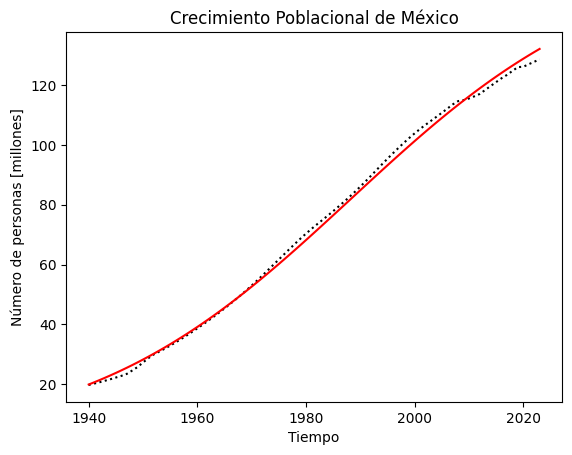

In [860]:
plt.plot(df1.index, df1[1], color='k', linestyle=':')
plt.plot(df1.index, modelo, color='r')
plt.xlabel('Tiempo')
plt.ylabel('Número de personas [millones]')
plt.title('Crecimiento Poblacional de México')
plt.show()

###Preguntas

1.   **¿Cuánto valen los parámetros que obtuviste de la función logística que mejor ajustan a los datos reales?**
x0=19.90200, a=0.04100, b=163.89300
2.   **¿Cuántas mutaciones “efectivas” se hicieron en cada parámetro para que el algoritmo converja?**
x=10, a=21, b=7
3. **Haz la gráfica de los datos reales junto con la curva logística que hayas obtenido que mejor ajusta los datos.**
4. **Si el crecimiento de la población en México continua con la misma tendencia, ¿cuántos años nos vamos a tardar en alcanzar el límite de saturación?**
Al despejar a $t$ de la ecuación logística, tenemos
\begin{equation*}
t = -\frac{1}{a} \cdot \ln\left( \frac{x_0 \cdot (b - x(t))}{(b - x_0) \cdot x(t)} \right)
\end{equation*}
por lo que considerando los parámetros $x_0=19.90200$, $a=0.04100$, $b=163.89300$ y sustituyendo, obtenemos:
\begin{equation*}
t = -\frac{1}{0.041} \cdot \ln\left( \frac{19.902 \cdot (163.893 - x(t))}{(163.893 - 19.902) \cdot x(t)} \right)
\end{equation*}
Dado que la población al tiempo $t$, $x(t)$ en el límite de saturación es practicamente la misma, representaremos la diferencia como $b-x(t)=0.01$ considerando b=1,y por ende $x(t)=0.99$ para fines prácticos. De esta manera:
\begin{equation*}
t = -\frac{1}{0.041} \cdot \ln\left( \frac{19.902 \cdot (0.01)}{(163.893 - 19.902) \cdot 0.99} \right) ≈ 160.34
\end{equation*}
Por lo que tardaríamos aproximadamente 160.34 años en alcanzar dicho límite
5. **¿Cuánto vale la población de saturación en México?**
Dado que $b$ es la población máxima a la que se puede llegar, este valor es aproximadamente 163.893 millones de personas
6. **¿Crees que es importante disminuir la tasa de crecimiento poblacional en México?**
Sí
7. **Si consideras que es importante disminuir la tasa de crecimiento poblacional, explica por qué y qué propondrías para hacerlo. Si consideras que no es importante, también explica por qué**
Dado que el tiempo para alcanzar el límite de saturación es relativamente cercano, considerando las condciones que propician la tasa de crecimiento constante obtenida, debemos considerar que en la vida real, estas condiciones pueden cambiar y disminuir o aumentar este tiempo. Es importante considerar que los recursos y el espacio en el que crece esta población es limitido, y que ese valor de saturación no contempla la calidad de vida de las personas. Sin embargo, la argumentación de esta respuesta dependería también de la tasa de defunción y migración del país, así como del porcentaje de grupos de población para dar una opinión más acertiva, pues estos factores afectarían el tiempo en que se alcanzaría el valor de saturacion, y el porcentaje de personas que pertenecen a cada grupo hablaría indirecatemnte de la calidad de vida que estas tendrían (recursos para jubulación, población generadora de recursos económicos, atención médica, etc.)



##Proyecto 2
Haz lo mismo que en el proyecto anterior, pero con los datos del crecimiento de la población de personas en México con VIH-SID contenidos en el archivo anexo *“PoblaciónVIH_Mexico.dat”*. En este caso tú tendrás que proponer los parámetros iniciales (es decir, tu primera adivinanza) así como las desviaciones estándar de las gaussianas que vas a utilizar para implementar las mutaciones.

Los datos presentados en la gráfica anterior y contenidos en el archivo *“PoblaciónVIH_Mexico.dat”* son los casos nuevos reportados cada año. La curva logística
se aplica a los casos acumulados (es decir, a la población total acumulada a lo largo del tiempo), por lo que tendrás que generar los datos de los casos acumulados para cada año. Los datos que estamos presentando no contienen las defunciones.

In [ ]:
df2 = pd.read_csv('./data/PoblacionVIH_Mexico.dat', delimiter='\t', header=None)
df2

,0,1
0,1983,67
1,1984,195
2,1985,368
3,1986,715
4,1987,1610
5,1988,2229
6,1989,2932
7,1990,3800
8,1991,4047
9,1992,4569


###Preguntas

1. **Tomando en cuenta los casos acumulados, si la tendencia sigue como hasta ahora respecto a la población con VIH-SIDA, ¿cuántos años faltan para que la curva “se aplane”, es decir, para alcanzar la población de saturación?**
2. **¿Cuánto vale la población de saturación?**
3. **Con base en las respuestas anteriores, ¿consideras que el VIH-SIDA es una enfermedad que ya pasó de moda o que es necesario implementar programas eficientes para atenderla de una mejor manera?**